In [58]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [6]:
data_path = '/home/rohan/Desktop/label-generator/raw_files/npz-files/'

In [46]:
data = np.load(data_path + '/match_047_stream0_psd_262.npz')

In [47]:
data.files

['c1', 'c2', 'c3', 'Z', 'labels']

In [48]:
data['labels'].shape

(1954, 512)

In [49]:
data['Z'].shape

(1954, 512)

In [50]:
np.unique(data['labels'], return_counts=True)

(array([0, 1, 2, 3], dtype=int8), array([909872,  48083,  28880,  13613]))

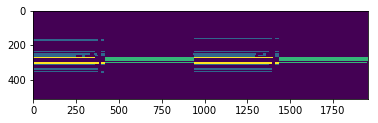

In [51]:
plt.imshow(data['labels'].T)

# plot some sample class data.

In [52]:
def plot_class_data(label_class, no=0):
    class_data = data[label_class]
    no_of_samples = data[label_class].shape[0]
    if no_of_samples <= 0:
        return
    
    start_x, start_y, end_x, end_y = class_data[no]
    plot_data = data['Z'][start_x: end_x, start_y: end_y]
    for i in range(plot_data.shape[0]):
        time_slice_plot = plot_data[i, :]
        plt.plot(time_slice_plot)
    plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler

def plot_scaled_class_data(label_class, no=0):
    class_data = data[label_class]
    no_of_samples = data[label_class].shape[0]
    if no_of_samples <= 0:
        return
    
    start_x, start_y, end_x, end_y = class_data[no]
    plot_data = data['Z'][start_x: end_x, start_y: end_y]
    for i in range(plot_data.shape[0]):
        time_slice_plot = plot_data[i, :]
        scaler = MinMaxScaler()
        scaler.fit([time_slice_plot])
        time_slice_plot = scaler.transform([time_slice_plot])
        plt.plot(time_slice_plot)
    plt.show()

In [53]:
data['c1'].shape

(30, 4)

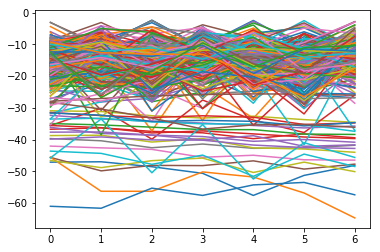

In [56]:
plot_class_data('c1', 0)

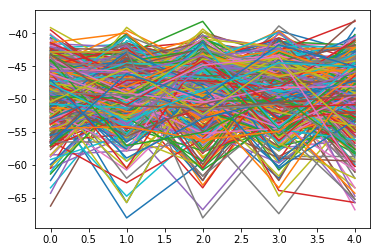

In [44]:
plot_class_data('c2', 3)

In [45]:
data['c3'].shape

(1, 4)

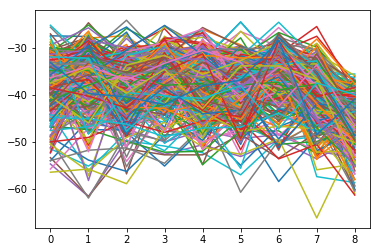

In [38]:
plot_class_data('c3')